In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 300
sns.set_style('darkgrid')
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Users/admin/Desktop/Project Deployment/Titanic_train.csv',index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df.describe()
#Positive skewness is there in Age,SibSp,Parch,Fare as mean>median

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

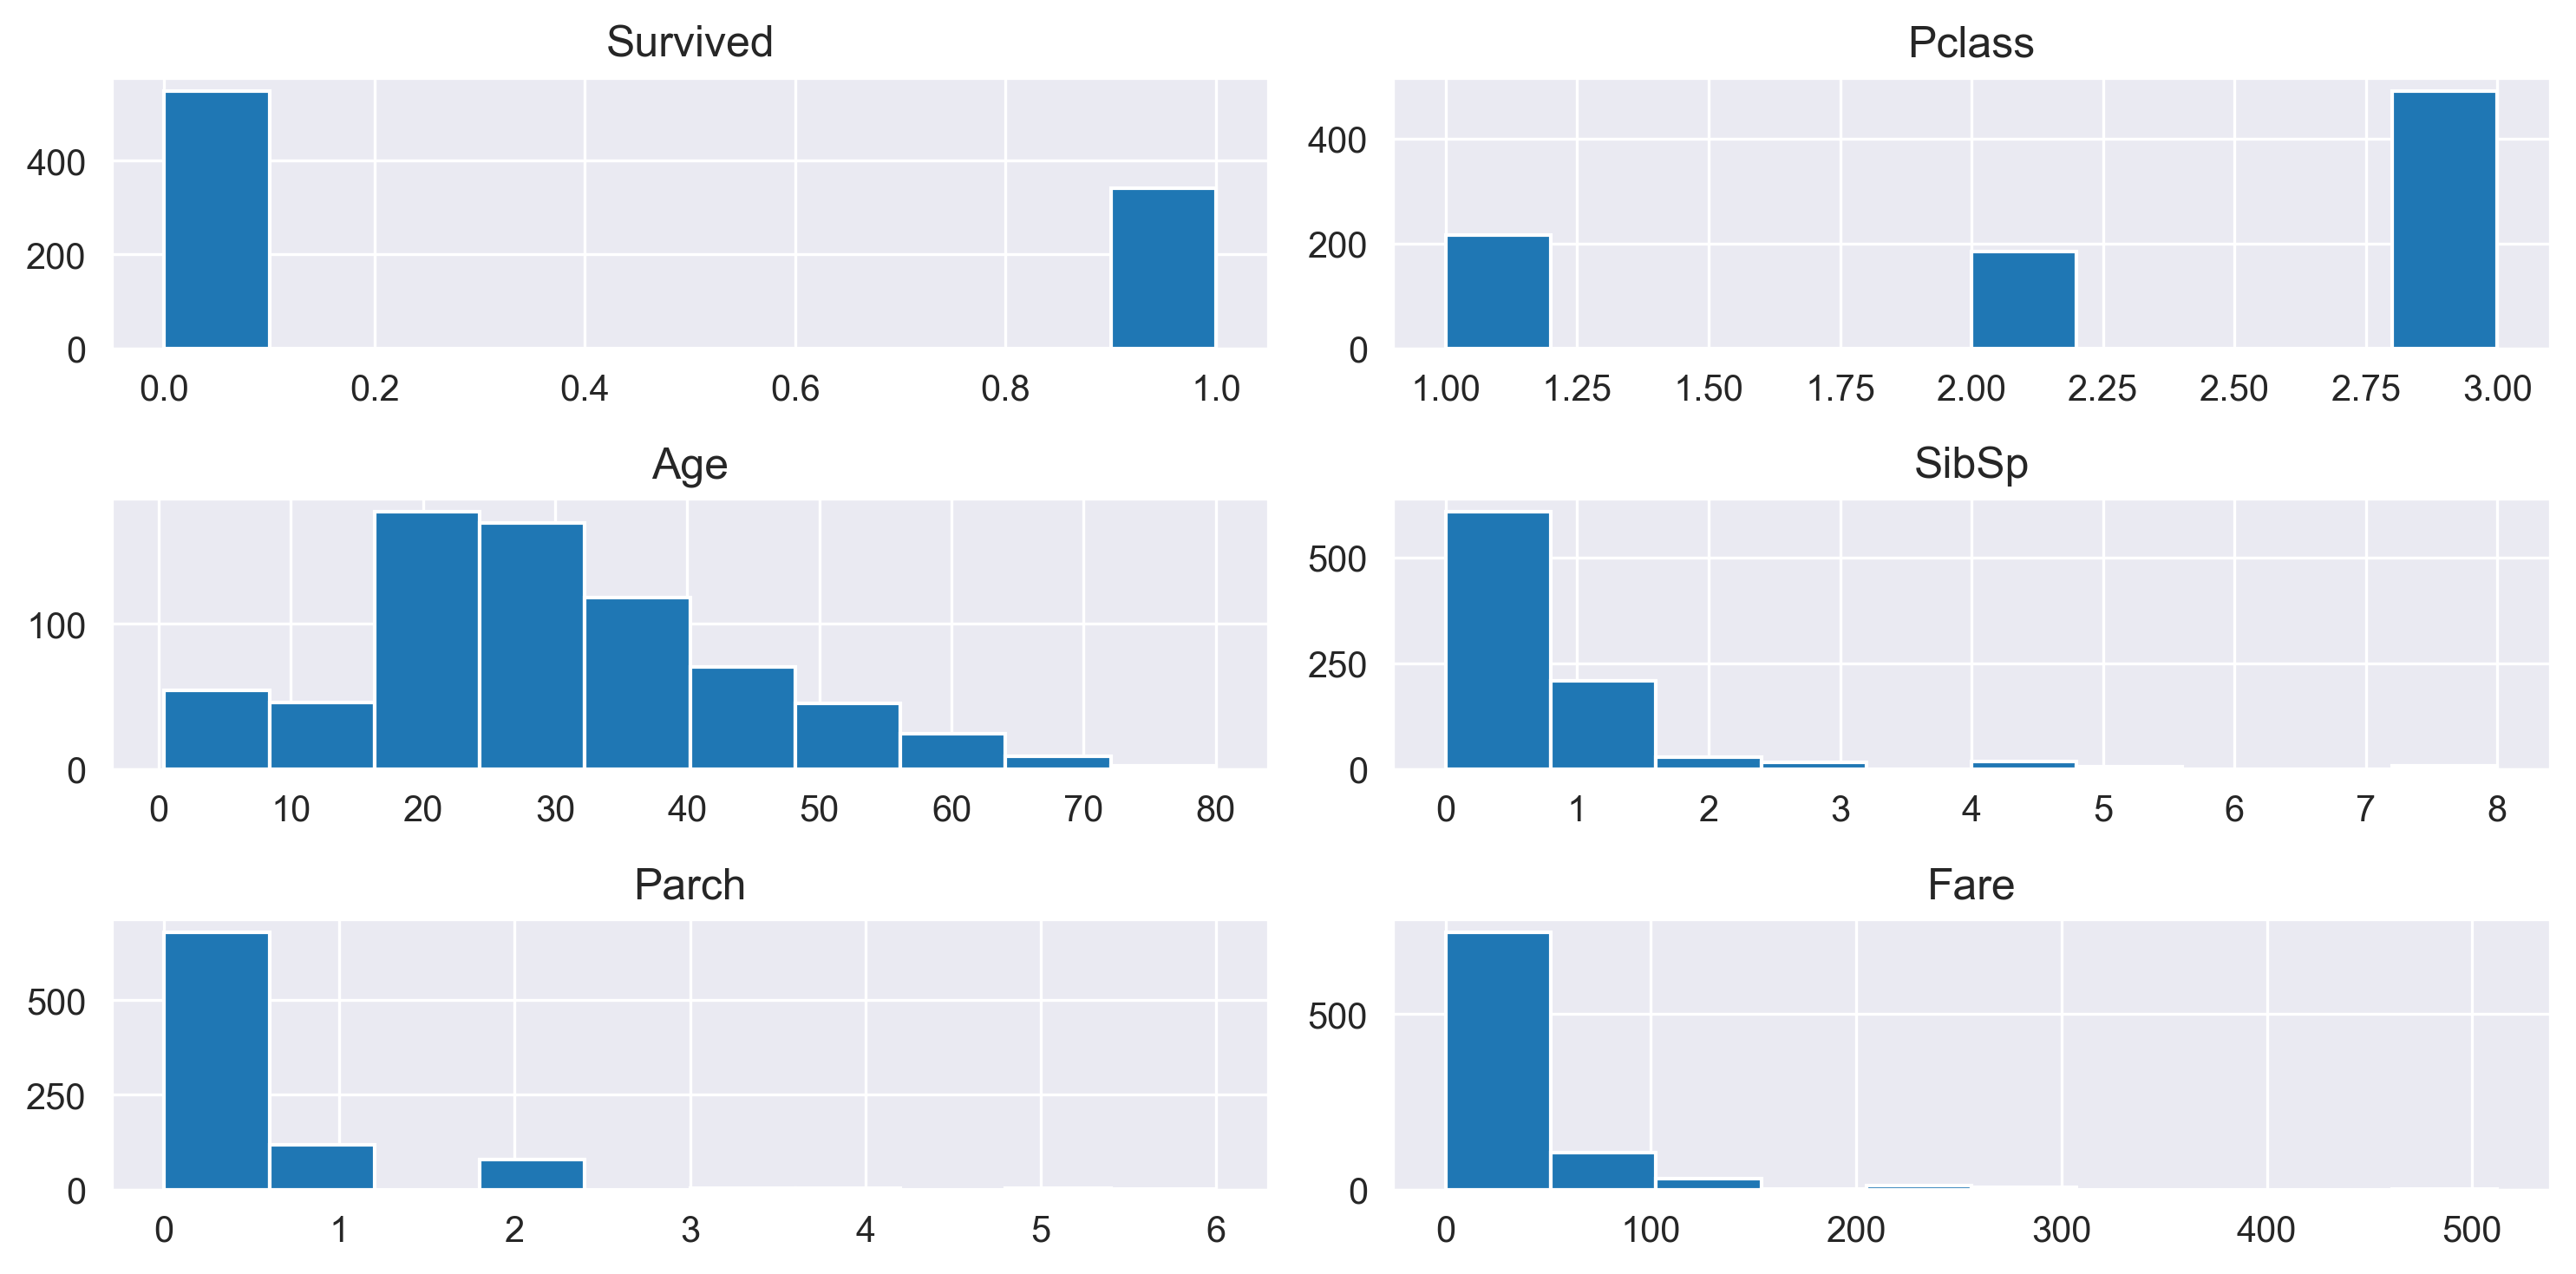

In [10]:
df.hist()
plt.tight_layout()

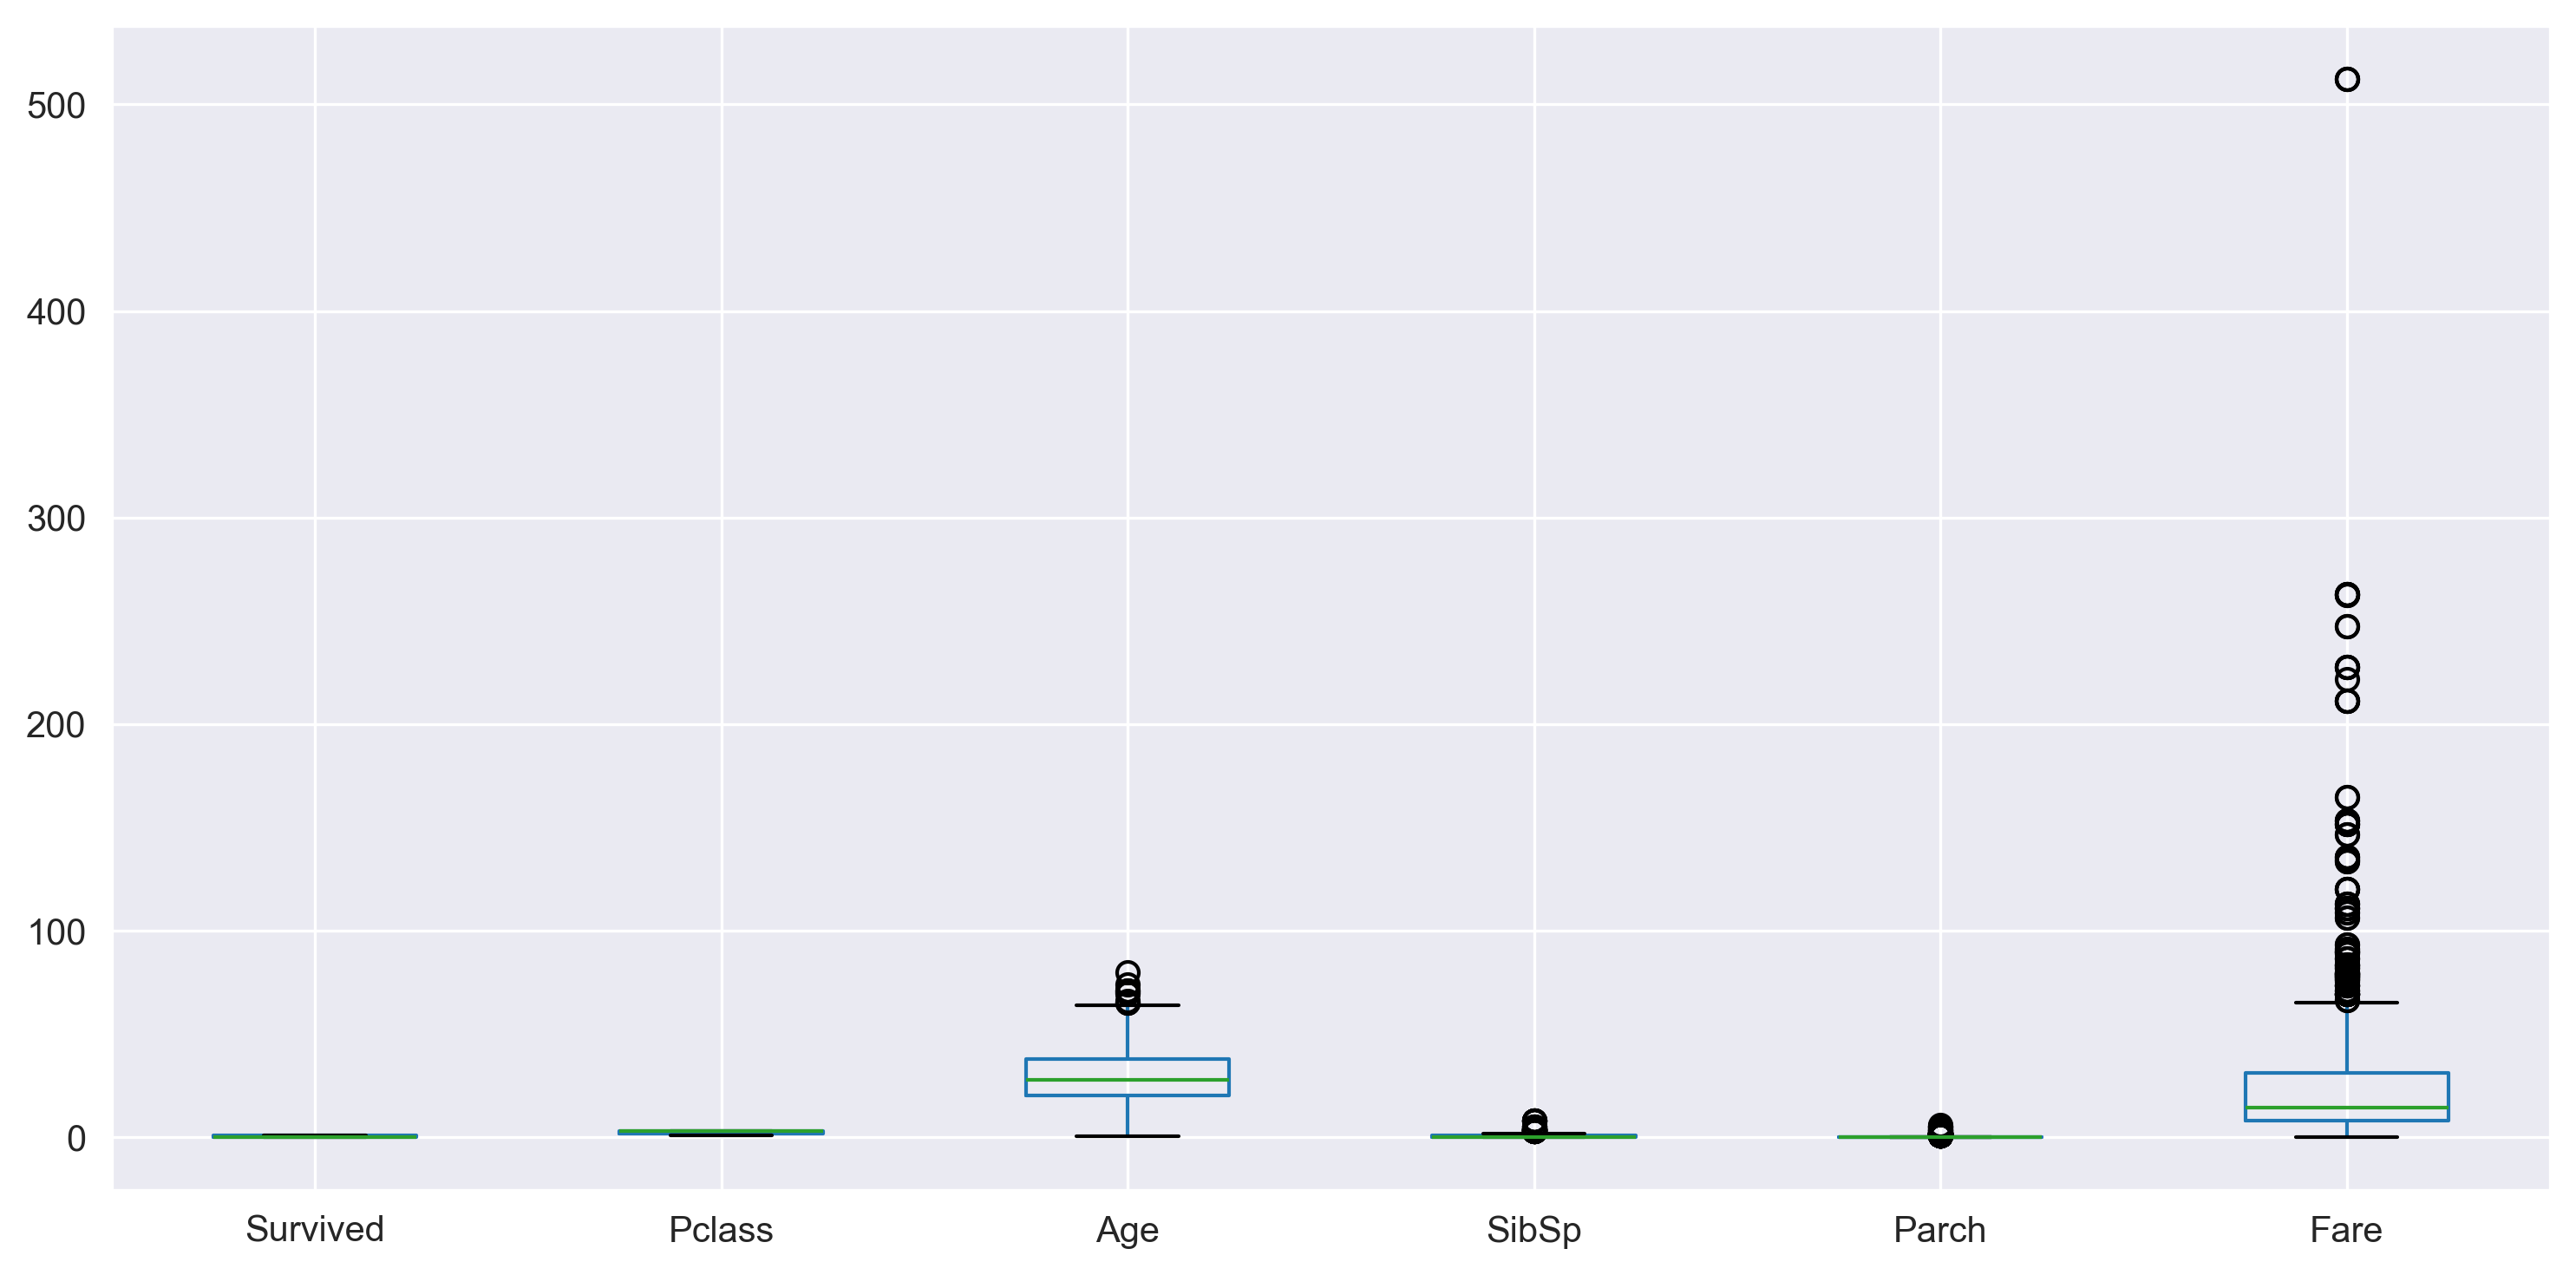

In [11]:
df.boxplot()
plt.tight_layout()

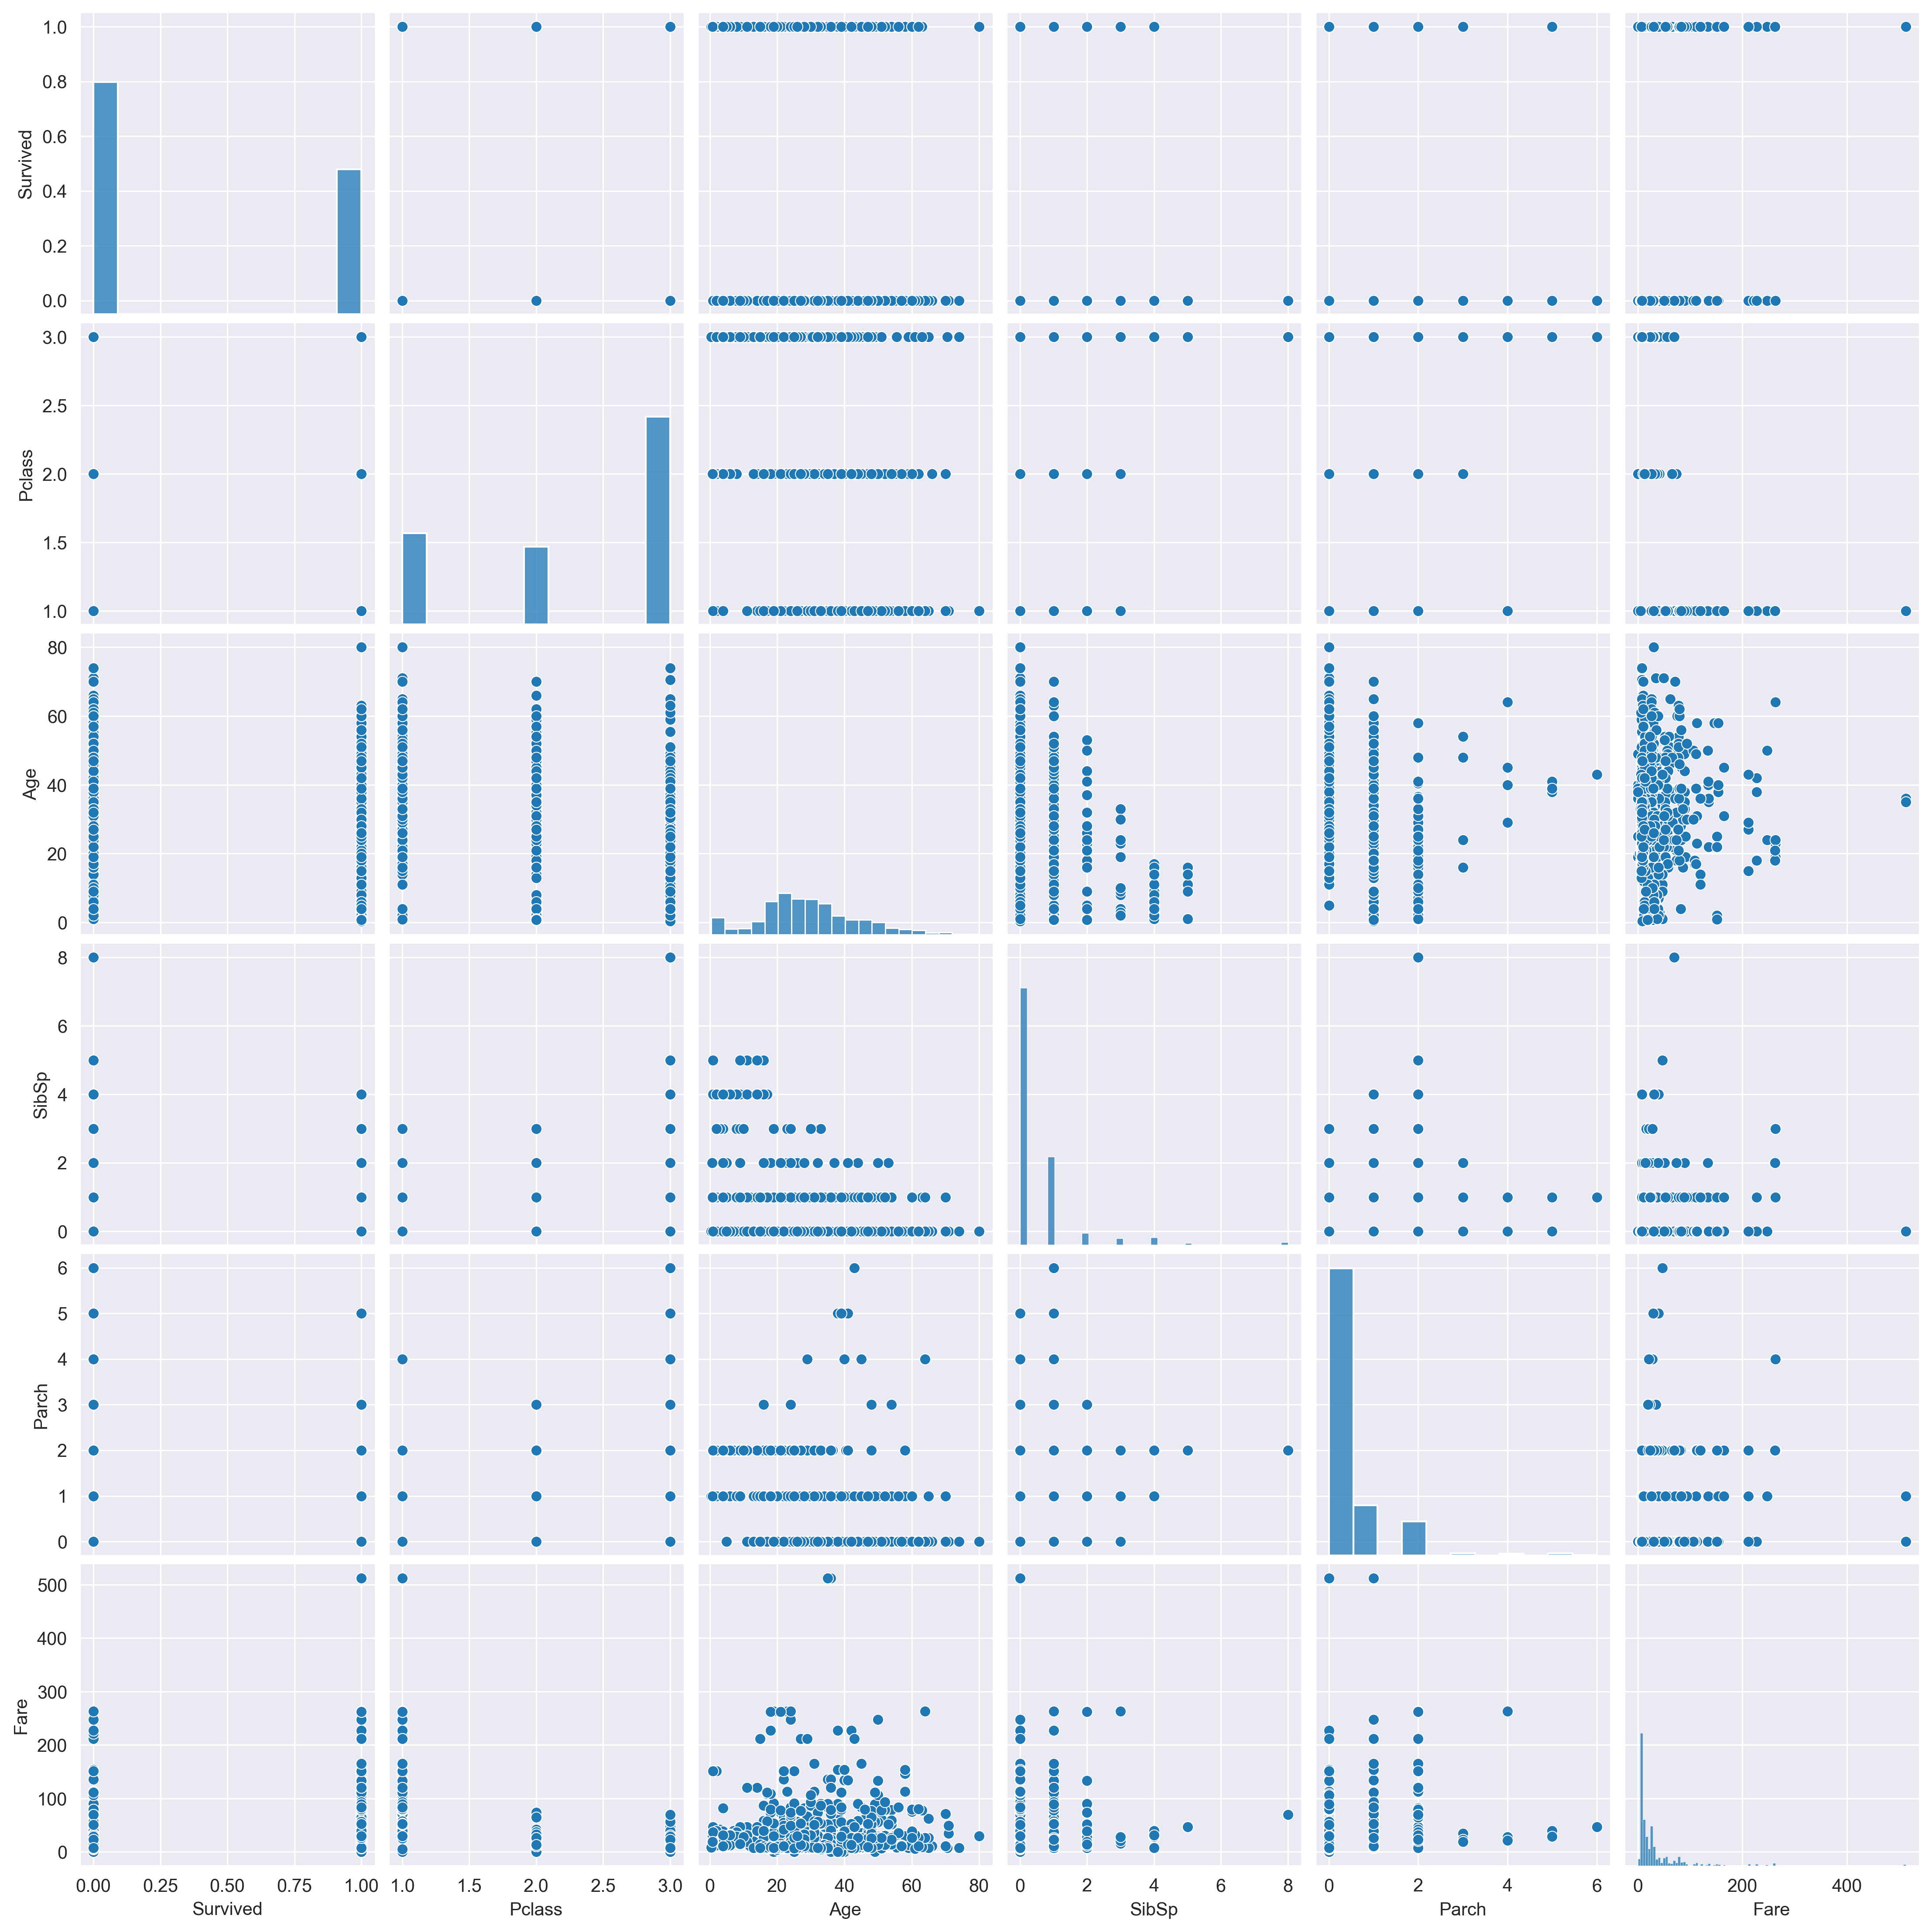

In [12]:
sns.pairplot(df)

<Axes: >

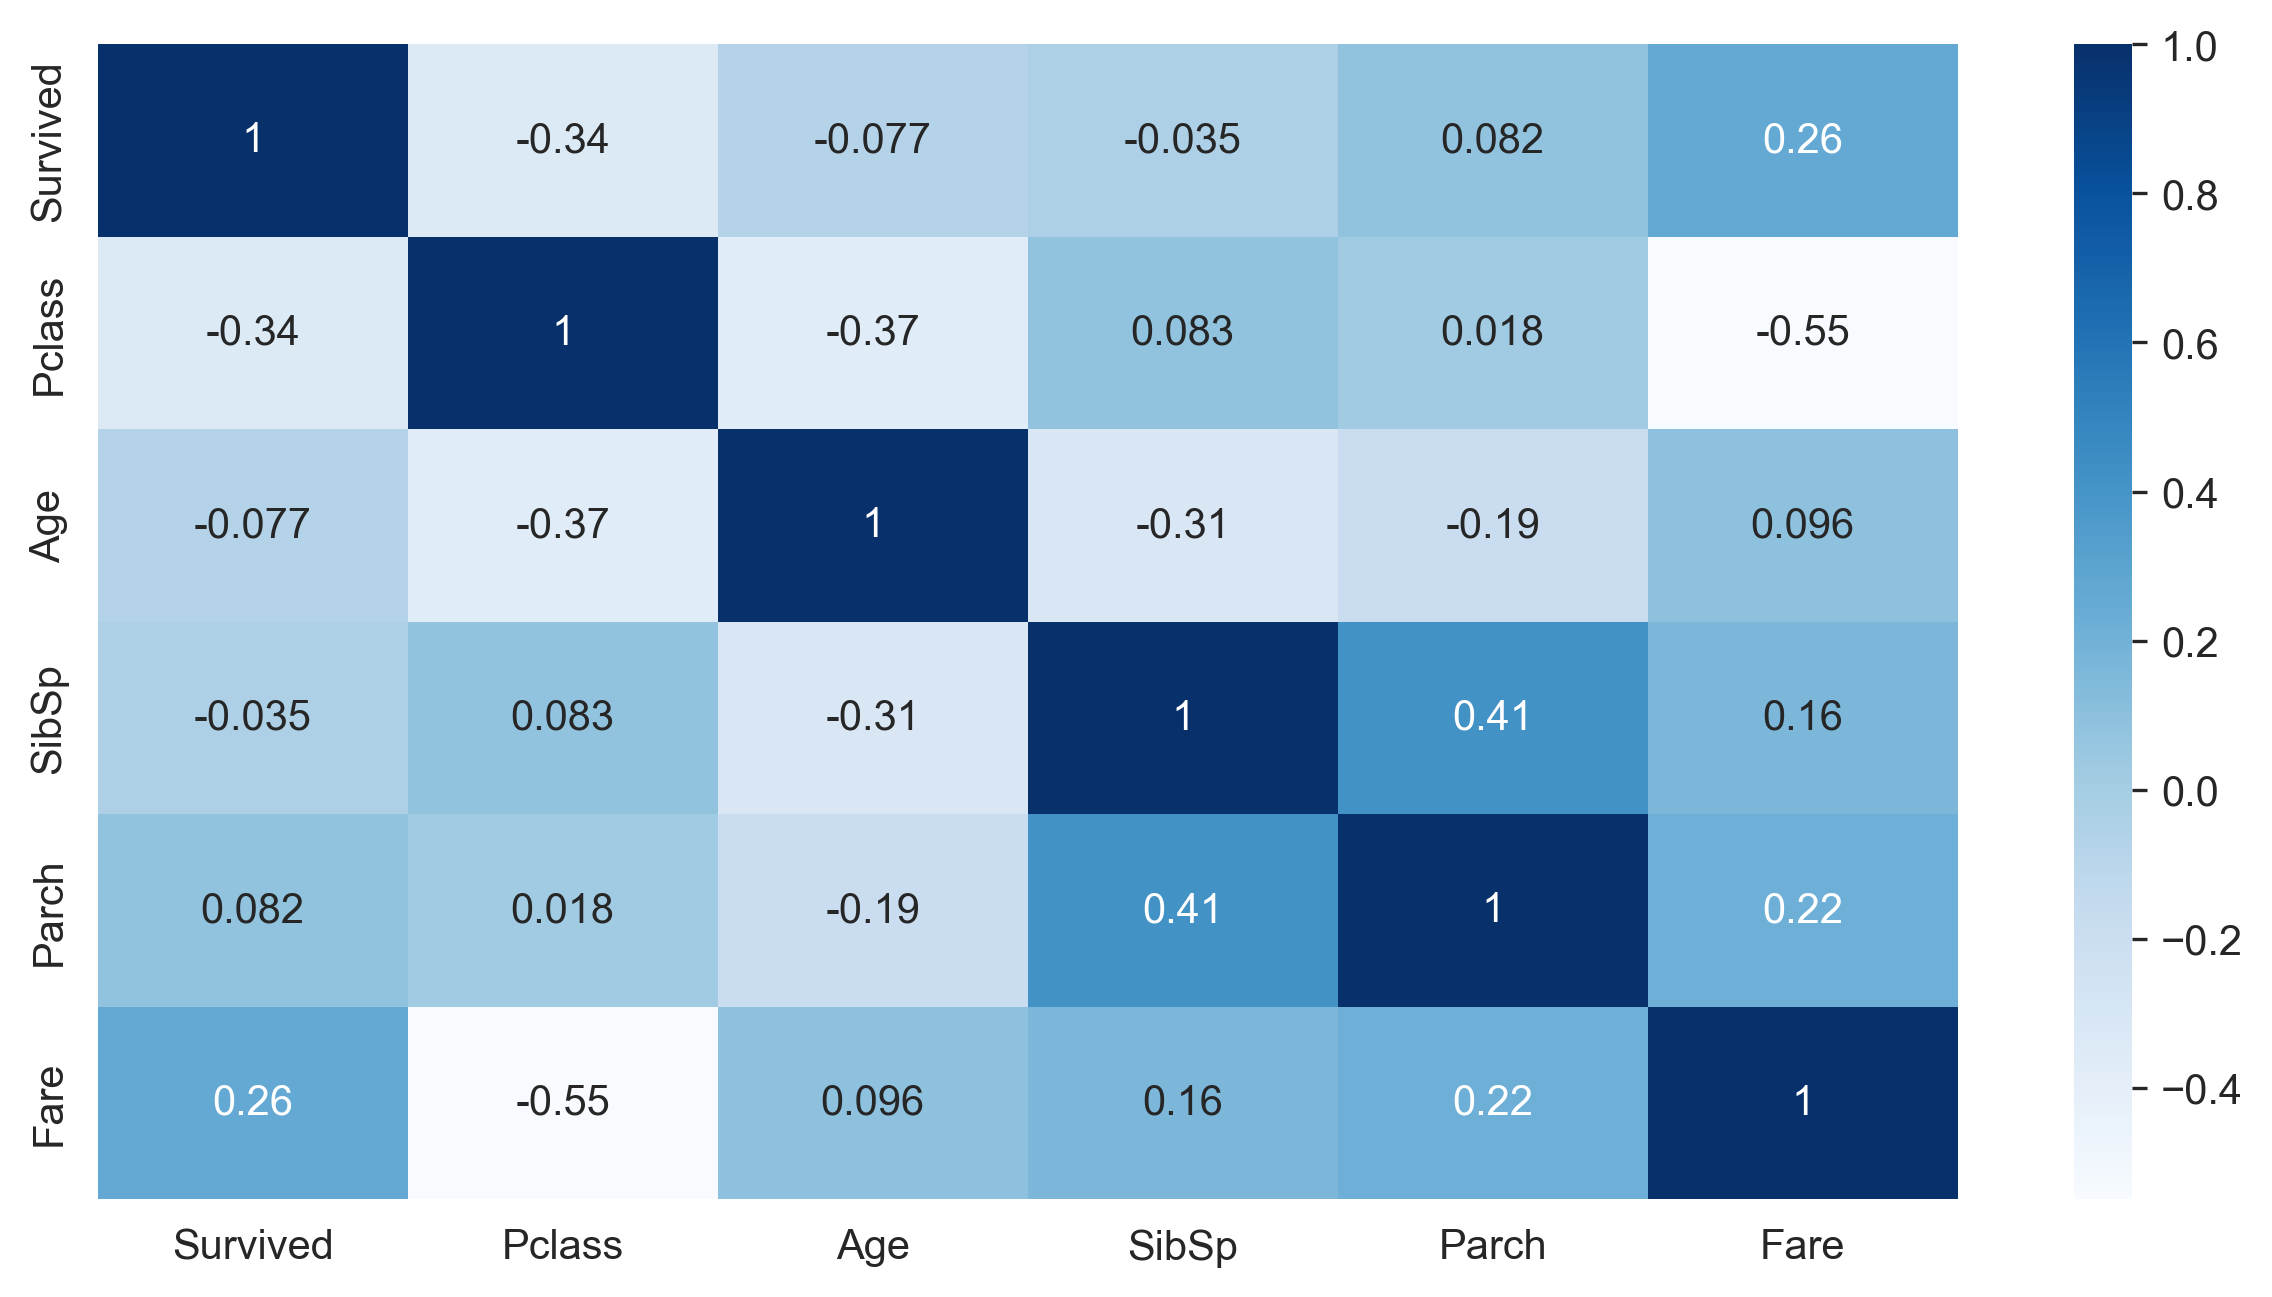

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

In [14]:
"""#Missing Value Imputation"""

df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='PassengerId'>

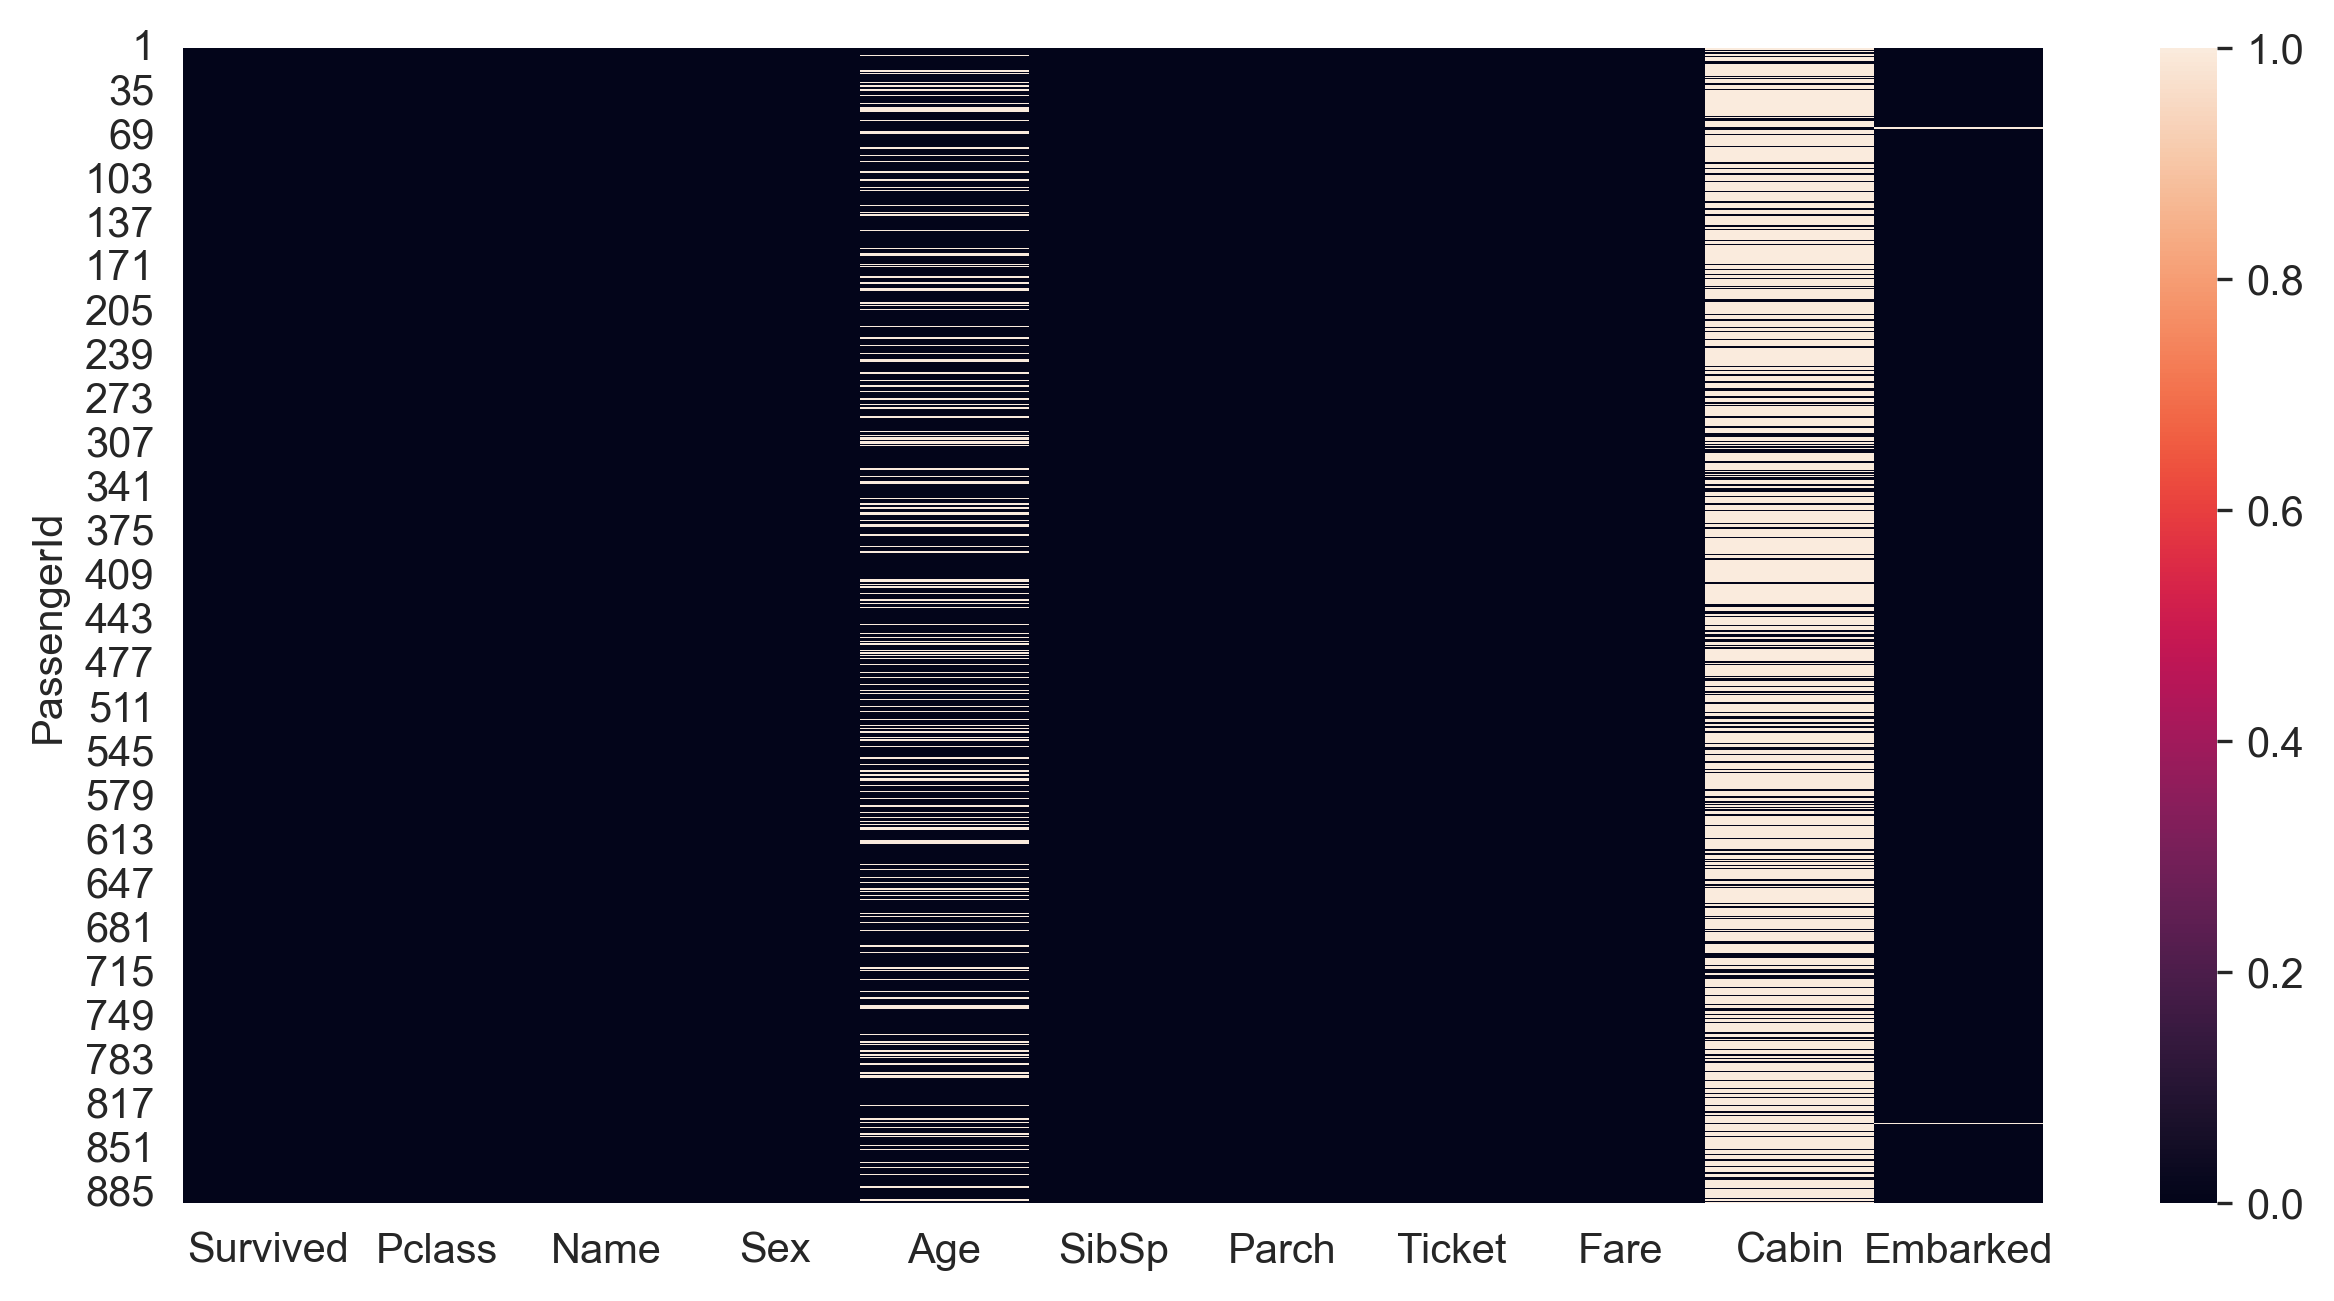

In [16]:
sns.heatmap(df.isna())

In [17]:
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
0.0
0.0
19.865319865319865
0.0
0.0
0.0
0.0
77.10437710437711
0.22446689113355783


In [18]:
"""1. Age : Replace as in range 6 to 45% and as outliers are there so replace by median
2. Cabin: range>45% so drop the column
3. Embarked: range<6% so drop row but we will replace with mode
"""

'1. Age : Replace as in range 6 to 45% and as outliers are there so replace by median\n2. Cabin: range>45% so drop the column\n3. Embarked: range<6% so drop row but we will replace with mode\n'

In [19]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
"""#Encoding categorical variables"""

df.drop(columns='Name',inplace=True)

df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [21]:
df.drop(columns='Ticket',inplace=True) #Unique values are more so its not imp

df=pd.get_dummies(df,columns=['Sex'],drop_first=True,dtype=int)
df=pd.get_dummies(df,columns=['Embarked'],dtype=int)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,0,1
888,1,1,19.0,0,0,30.0000,0,0,0,1
889,0,3,28.0,1,2,23.4500,0,0,0,1


In [22]:
X=df.iloc[:,1:]
Y=df.iloc[:,0] #Dependent variable
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,0,1
2,1,38.0,1,0,71.2833,0,1,0,0
3,3,26.0,0,0,7.9250,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,1
5,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,1,0,0,1
888,1,19.0,0,0,30.0000,0,0,0,1
889,3,28.0,1,2,23.4500,0,0,0,1


In [23]:
"""#Logistic Regression and Fit model"""

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X,Y)

y_pred=classifier.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [24]:
y_pred_df=pd.DataFrame({'Actual':Y,'Predicted':y_pred})
y_pred_df

,Actual,Predicted
PassengerId,,
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
...,...,...
887,0,0
888,1,1
889,0,0


In [25]:
"""#Confusion matrix for model accuracy"""

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
confusion_matrix

array([[479,  70],
       [105, 237]])

In [26]:

Accuracy=(479+237)*100/(479+70+105+237) #(TP+TN)*100/(TP+FP+FN+TN)
print(Accuracy)

Recall=479*100/(479+105) #TP*100/(TP+FN)
print(Recall)

Precision=479*100/(479+70) #TP*100/(TP+FP)
print(Precision)

F_score=2*Precision*Recall/(Precision+Recall)
print(F_score)

80.3591470258137
82.02054794520548
87.2495446265938
84.55428067078552


Text(0, 0.5, 'True Positive Rate')

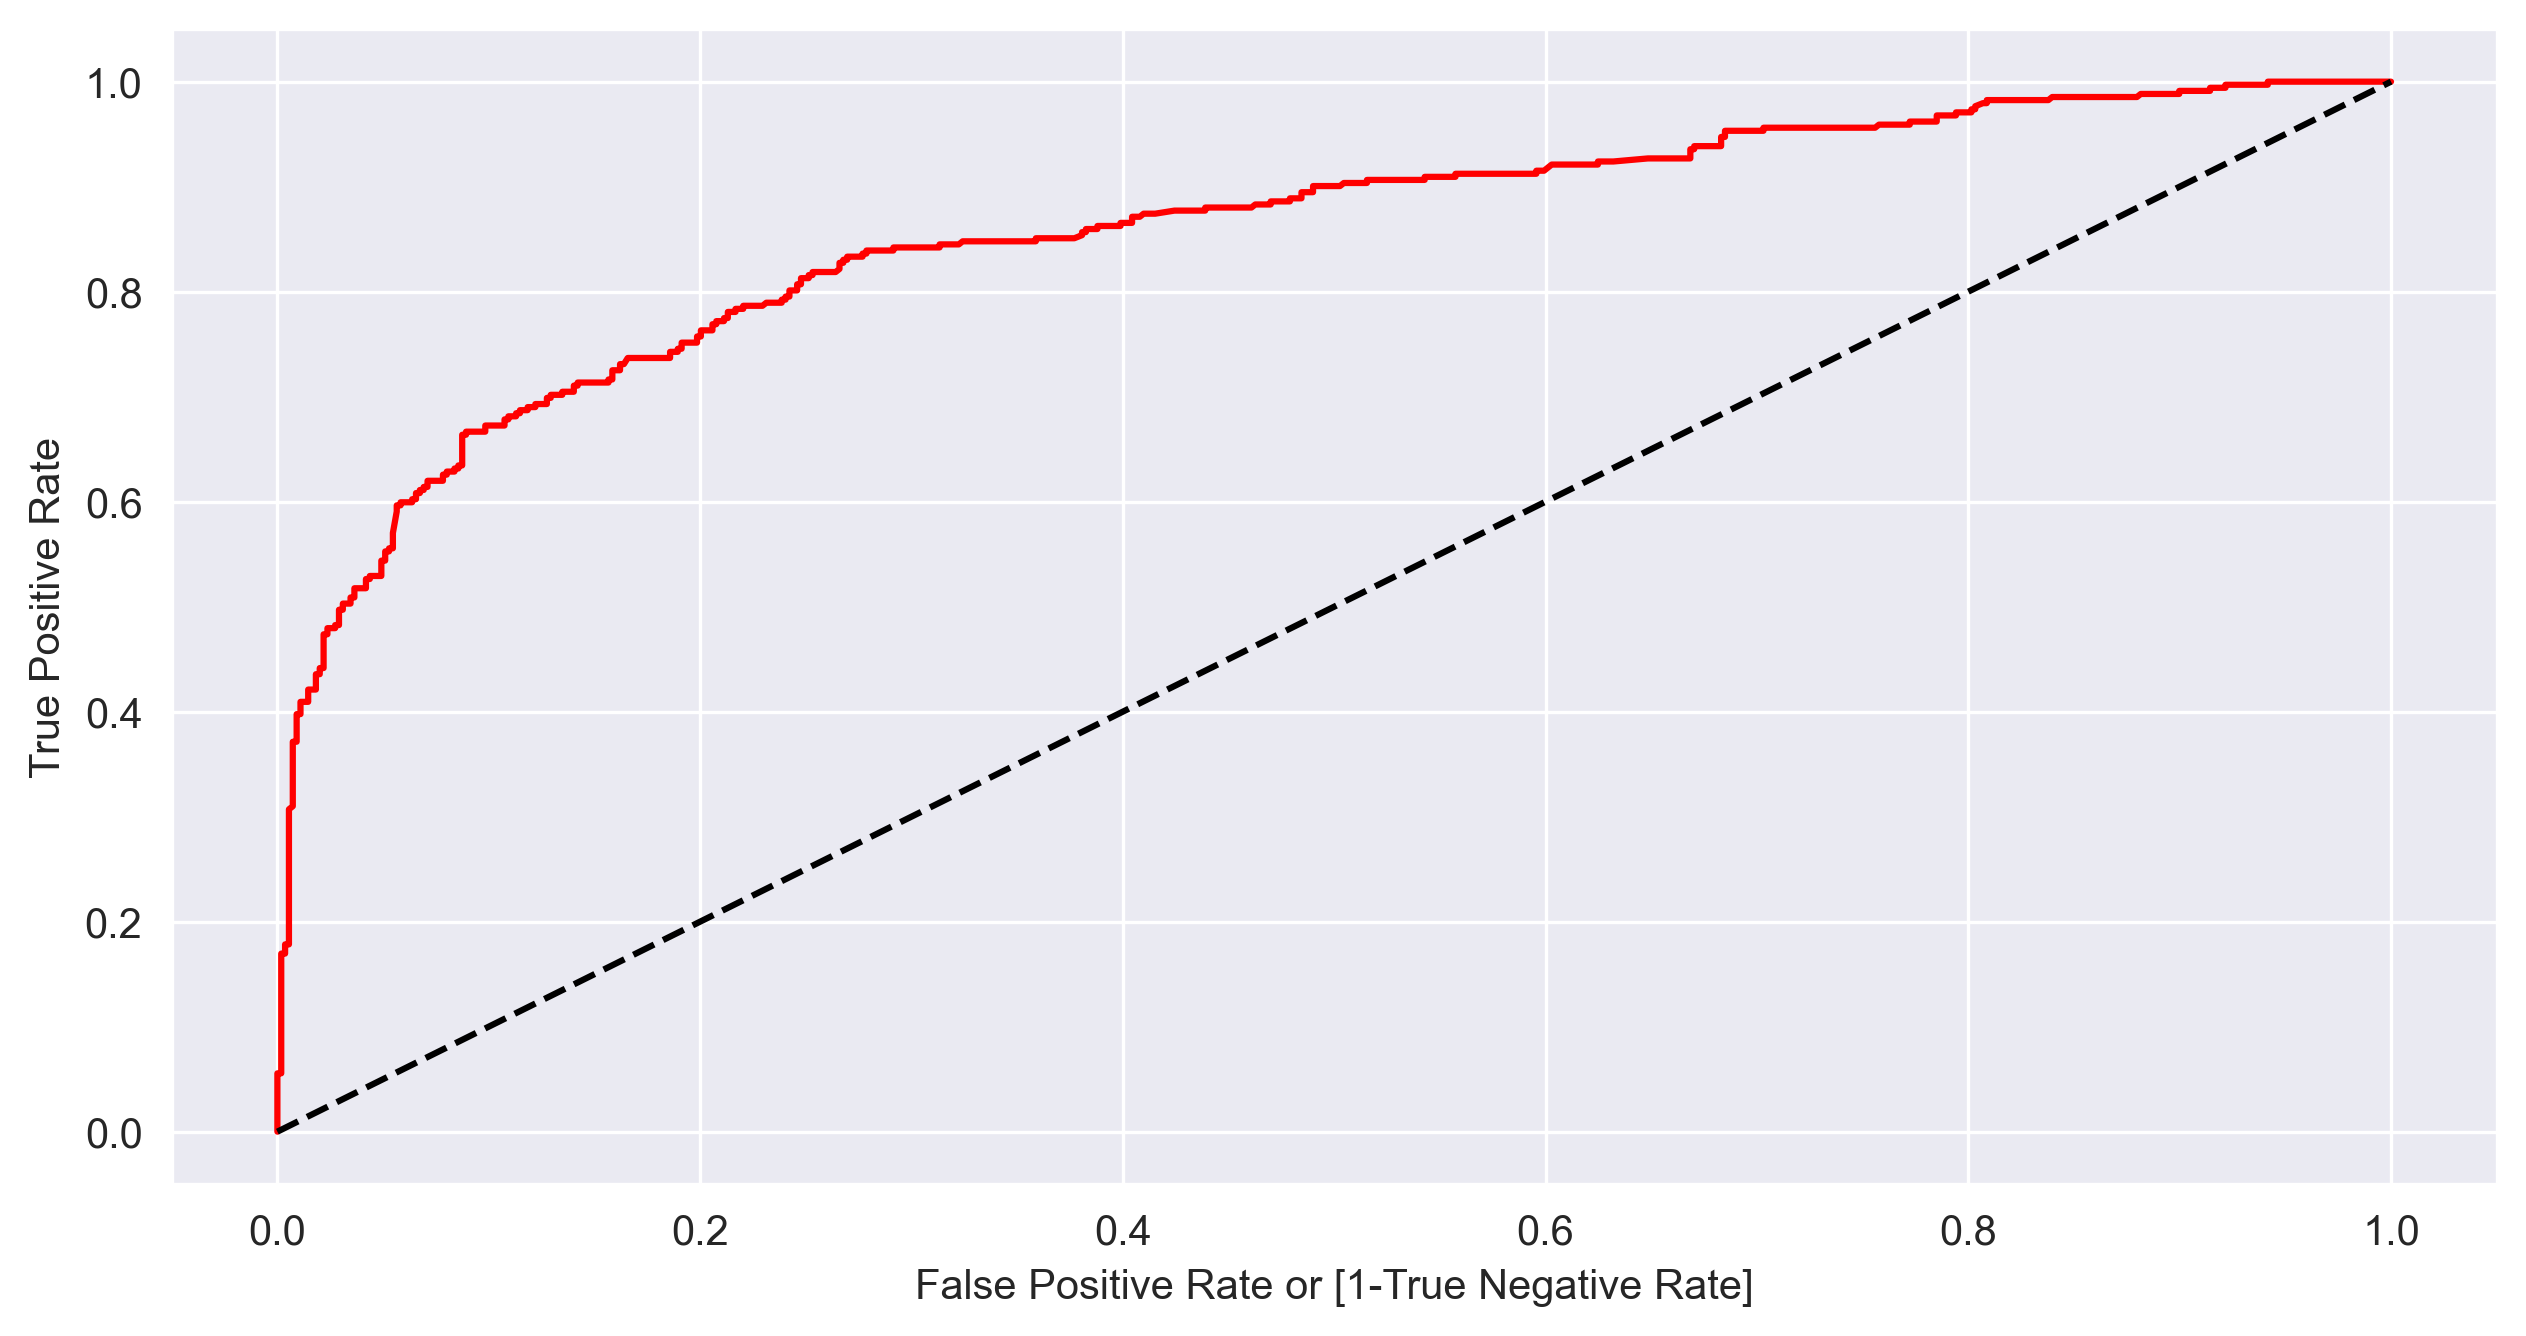

In [27]:
"""#ROC Curve"""

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [28]:
auc=roc_auc_score(Y,y_pred)
auc

np.float64(0.7827389512031445)

In [29]:

"""#Testing data"""

df1=pd.read_csv('C:/Users/admin/Desktop/Project Deployment/Titanic_test.csv',index_col='PassengerId')
df1

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [30]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)
df1['Fare'].fillna(df1['Fare'].median(),inplace=True)
df1.drop('Cabin',axis=1,inplace=True)
df1.isna().sum()


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
df1.drop(columns='Ticket',inplace=True)
df1.drop(columns='Name',inplace=True)

df1=pd.get_dummies(df1,columns=['Sex'],drop_first=True,dtype=int)
df1=pd.get_dummies(df1,columns=['Embarked'],dtype=int)
df1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0
893,3,47.0,1,0,7.0000,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,1,0
895,3,27.0,0,0,8.6625,1,0,0,1
896,3,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,27.0,0,0,8.0500,1,0,0,1
1306,1,39.0,0,0,108.9000,0,1,0,0
1307,3,38.5,0,0,7.2500,1,0,0,1


In [32]:
y_test_pred=classifier.predict(df1)
y_test_pred

y_test_pred=pd.DataFrame({'Predicted':y_test_pred})
y_test_pred

,Predicted
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [33]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
import streamlit as st
import pickle

In [35]:
pickle.dump(classifier,open('classifier.pkl','wb'))